# Name - Bushra Rahman
## Data Science Internship
## Bharat Intern - Jan/2024

## Project No. 03 - Cat and Dog Image Classifier

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install opencv-python

                                              0.0/38.6 MB ? eta -:--:--
                                             0.0/38.6 MB 640.0 kB/s eta 0:01:01
                                              0.1/38.6 MB 1.0 MB/s eta 0:00:38
                                              0.1/38.6 MB 1.1 MB/s eta 0:00:37
                                             0.2/38.6 MB 952.6 kB/s eta 0:00:41
                                              0.2/38.6 MB 1.0 MB/s eta 0:00:38
                                              0.3/38.6 MB 1.1 MB/s eta 0:00:35
                                             0.3/38.6 MB 999.9 kB/s eta 0:00:39
                                              0.4/38.6 MB 1.0 MB/s eta 0:00:38
                                             0.4/38.6 MB 916.6 kB/s eta 0:00:42
                                             0.4/38.6 MB 922.1 kB/s eta 0:00:42
                                             0.4/38.6 MB 823.4 kB/s eta 0:00:47
                                             0.5/38.6


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ----                                    4.8/38.6 MB 360.7 kB/s eta 0:01:34
     ----                                    4.8/38.6 MB 360.7 kB/s eta 0:01:34
     ----                                    4.8/38.6 MB 360.7 kB/s eta 0:01:34
     ----                                    4.8/38.6 MB 358.8 kB/s eta 0:01:35
     ----                                    4.8/38.6 MB 358.8 kB/s eta 0:01:35
     ----                                    4.9/38.6 MB 358.7 kB/s eta 0:01:35
     ----                                    4.9/38.6 MB 358.7 kB/s eta 0:01:35
     ----                                    4.9/38.6 MB 358.7 kB/s eta 0:01:35
     ----                                    4.9/38.6 MB 358.7 kB/s eta 0:01:35
     ----                                    4.9/38.6 MB 358.7 kB/s eta 0:01:35
     ----                                    4.9/38.6 MB 358.7 kB/s eta 0:01:35
     ----                                    4.9/38.6 MB 358.7 kB/s eta 0:01:35
     ----                               

In [2]:
## Importing required Libraries

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 3000 files belonging to 2 classes.


In [5]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 1020 files belonging to 2 classes.


In [6]:
# Normalise
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))       

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [69]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
94/94 [==============================] - 126s 1s/step - loss: 0.5465 - accuracy: 0.7907 - val_loss: 0.8275 - val_accuracy: 0.6137
Epoch 2/10
94/94 [==============================] - 116s 1s/step - loss: 0.5296 - accuracy: 0.7943 - val_loss: 1.5440 - val_accuracy: 0.6373
Epoch 3/10
94/94 [==============================] - 122s 1s/step - loss: 0.3866 - accuracy: 0.8397 - val_loss: 0.8665 - val_accuracy: 0.7020
Epoch 4/10
94/94 [==============================] - 119s 1s/step - loss: 0.2890 - accuracy: 0.8780 - val_loss: 0.8983 - val_accuracy: 0.7373
Epoch 5/10
94/94 [==============================] - 117s 1s/step - loss: 0.2572 - accuracy: 0.8967 - val_loss: 1.1563 - val_accuracy: 0.6833
Epoch 6/10
94/94 [==============================] - 118s 1s/step - loss: 0.1769 - accuracy: 0.9193 - val_loss: 1.0273 - val_accuracy: 0.7206
Epoch 7/10
94/94 [==============================] - 127s 1s/step - loss: 0.1656 - accuracy: 0.9277 - val_loss: 1.2364 - val_accuracy: 0.7294
Epoch 8/10
94

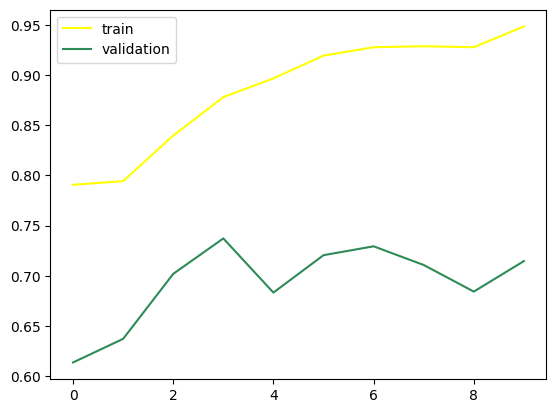

In [71]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='yellow',label='train')
plt.plot(history.history['val_accuracy'],color='seagreen',label='validation')
plt.legend()
plt.show()

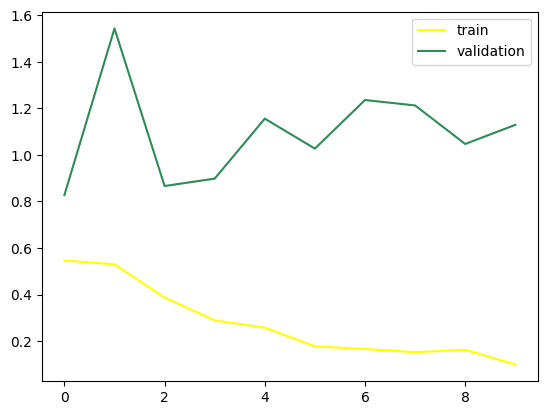

In [72]:
plt.plot(history.history['loss'],color='yellow',label='train')
plt.plot(history.history['val_loss'],color='seagreen',label='validation')
plt.legend()
plt.show()

### Testing with new data

In [74]:
import cv2

In [87]:
test_img = cv2.imread('Dog1.jpg')

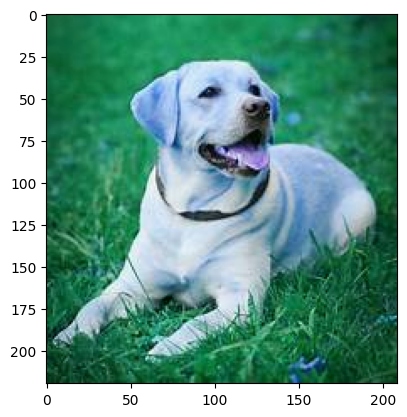

In [88]:
plt.imshow(test_img)

In [89]:
test_img.shape

(220, 209, 3)

In [90]:
test_img = cv2.resize(test_img,(256,256))

In [91]:
test_input = test_img.reshape((1,256,256,3))

In [92]:
model.predict(test_input)

1/1 [==============================] - 0s 46ms/step


array([[1.]], dtype=float32)

In [93]:
#cat

In [119]:
test_img = cv2.imread('Cat2.jpg')

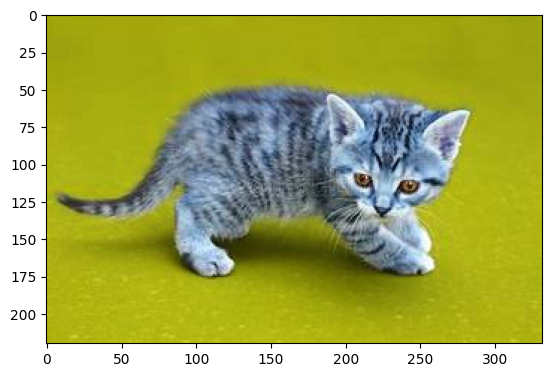

In [120]:
plt.imshow(test_img)

In [121]:
test_img.shape

(220, 332, 3)

In [122]:
test_img = cv2.resize(test_img,(256,256))

In [123]:
test_input = test_img.reshape((1,256,256,3))

In [124]:
model.predict(test_input)

1/1 [==============================] - 0s 41ms/step


array([[0.]], dtype=float32)

In [125]:
#Prefectly predicting
#cat - 0
#Dog - 1